<img src=images/MIT_logo.jpg width=150 align=right />

# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS

# Correlation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Portfolio selection problem
[Modern portfolio theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory) implies that allocating an optimal amount of capital to different assets in a portfolio can result in a better risk-return profile than any of the individual assets in that portfolio.

In [2]:
returns = pd.DataFrame({'Mean': [3.23, 1.08],
                        'SD':   [8.40, 5.38]},
                       index=['Amazon', 'Walmart'])
returns

,Mean,SD
Amazon,3.23,8.40
Walmart,1.08,5.38


If we invest `a` and `b` proportions of capital in each company, we can compute the resulting mean return and risk (return SD): 

Optimal `a`: 0.29
Minimum risk: 4.53
Return of minimum risk: 1.7


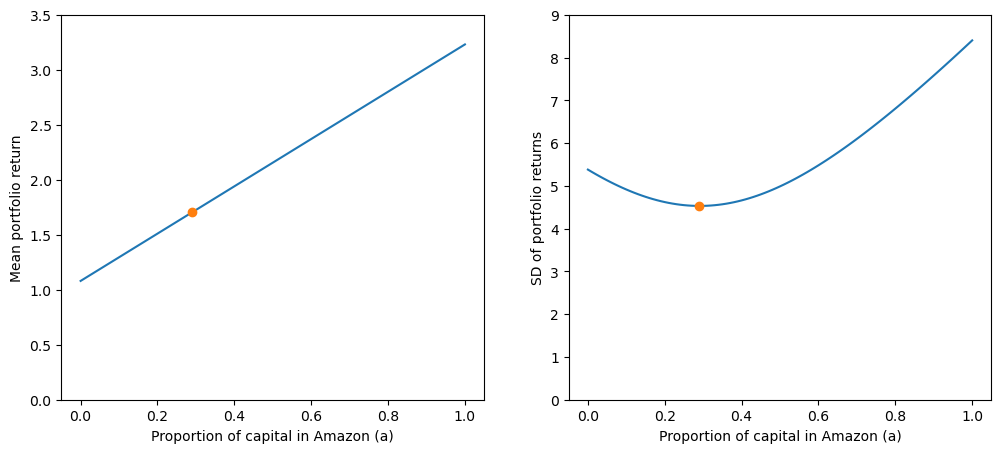

In [3]:
a = np.linspace(0, 1, 101)
b = 1 - a # Since proportions add up to 1.

mean_return_portfolio = a * returns.loc['Amazon', 'Mean'] + b * returns.loc['Walmart', 'Mean']
sd_return_portfolio = np.sqrt(a**2 * returns.loc['Amazon', 'SD']**2 + b**2 * returns.loc['Walmart', 'SD']**2)

min_risk_idx = np.argmin(sd_return_portfolio)
print('Optimal `a`:', round(a[min_risk_idx], 2))
print('Minimum risk:', round(sd_return_portfolio[min_risk_idx], 2))
print('Return of minimum risk:', round(mean_return_portfolio[min_risk_idx], 2))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(a, mean_return_portfolio)
ax[1].plot(a, sd_return_portfolio)
ax[0].scatter(a[min_risk_idx], mean_return_portfolio[min_risk_idx], c='tab:orange', zorder=2)
ax[1].scatter(a[min_risk_idx], sd_return_portfolio[min_risk_idx], c='tab:orange', zorder=2)

ax[0].set_ylim((0, 3.5))
ax[1].set_ylim((0, 9))
ax[0].set_xlabel('Proportion of capital in Amazon (a)')
ax[1].set_xlabel('Proportion of capital in Amazon (a)')
ax[0].set_ylabel('Mean portfolio return')
ax[1].set_ylabel('SD of portfolio returns')

plt.show()

Optimal `a`: 0.55
Minimum coefficient of variation: 2.31
Maximum Sharpe ratio: 0.43


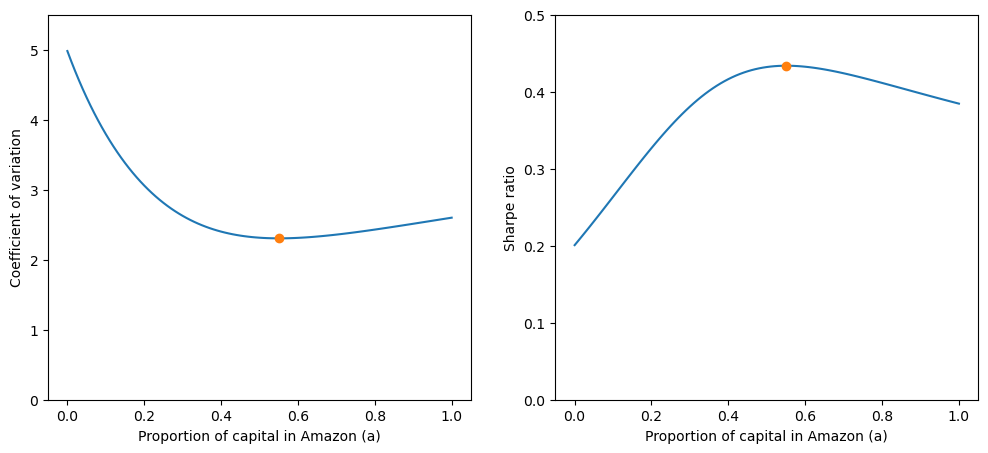

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

coefficient_variation = sd_return_portfolio / mean_return_portfolio
sharpe_ratio = mean_return_portfolio / sd_return_portfolio

min_cv_idx = np.argmin(coefficient_variation)

print('Optimal `a`:', round(a[min_cv_idx], 2))
print('Minimum coefficient of variation:', round(coefficient_variation[min_cv_idx], 2))
print('Maximum Sharpe ratio:', round(sharpe_ratio[min_cv_idx], 2))

ax[0].plot(a, coefficient_variation)
ax[1].plot(a, sharpe_ratio)
ax[0].scatter(a[min_cv_idx], coefficient_variation[min_cv_idx], c='tab:orange', zorder=2)
ax[1].scatter(a[min_cv_idx], sharpe_ratio[min_cv_idx], c='tab:orange', zorder=2)

ax[0].set_ylim((0, 5.5))
ax[1].set_ylim((0, 0.5))
ax[0].set_xlabel('Proportion of capital in Amazon (a)')
ax[1].set_xlabel('Proportion of capital in Amazon (a)')
ax[0].set_ylabel('Coefficient of variation')
ax[1].set_ylabel('Sharpe ratio')

plt.show()

### Correlated stocks
Up to this point, we have assumed that the two stocks are not correlated, but correlation will affect the results significantly and in practice has to be accounted for.

Optimal `a`: 0.27
Minimum risk: 4.75
Return of minimum risk: 1.66


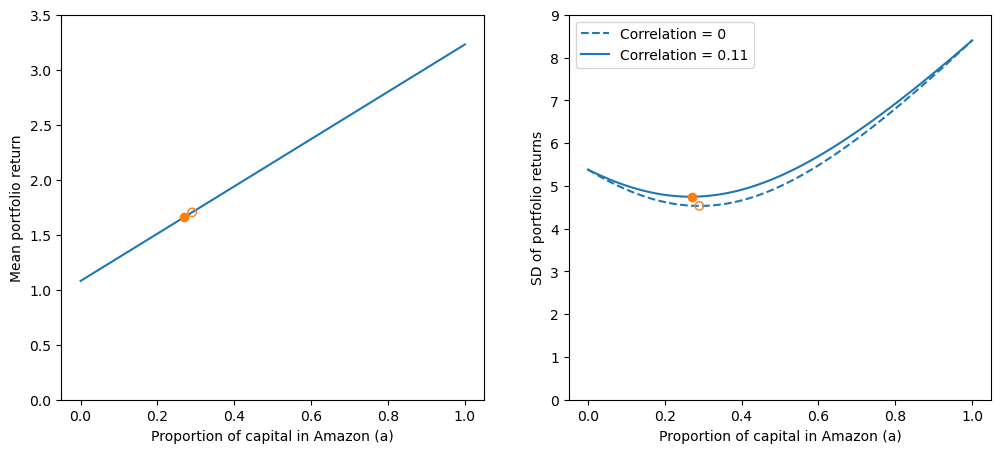

In [5]:
correlation = 0.11

cor_sd_return_portfolio = np.sqrt(a**2 * returns.loc['Amazon', 'SD']**2 + b**2 * returns.loc['Walmart', 'SD']**2 
                                  + 2*a*b * returns.loc['Amazon', 'SD'] * returns.loc['Walmart', 'SD'] * correlation)

cor_min_risk_idx = np.argmin(cor_sd_return_portfolio)
print('Optimal `a`:', round(a[cor_min_risk_idx], 2))
print('Minimum risk:', round(cor_sd_return_portfolio[cor_min_risk_idx], 2))
print('Return of minimum risk:', round(mean_return_portfolio[cor_min_risk_idx], 2))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(a, mean_return_portfolio)
ax[1].plot(a, sd_return_portfolio, linestyle='dashed')
ax[1].plot(a, cor_sd_return_portfolio, c='tab:blue')
ax[0].scatter(a[min_risk_idx], mean_return_portfolio[min_risk_idx], edgecolors='tab:orange', facecolors='none', zorder=2)
ax[0].scatter(a[cor_min_risk_idx], mean_return_portfolio[cor_min_risk_idx], c='tab:orange', zorder=2)
ax[1].scatter(a[min_risk_idx], sd_return_portfolio[min_risk_idx], edgecolors='tab:orange', facecolors='none', zorder=2)
ax[1].scatter(a[cor_min_risk_idx], cor_sd_return_portfolio[cor_min_risk_idx], c='tab:orange', zorder=2)

ax[1].legend(['Correlation = 0', 'Correlation = 0.11'])

ax[0].set_ylim((0, 3.5))
ax[1].set_ylim((0, 9))
ax[0].set_xlabel('Proportion of capital in Amazon (a)')
ax[1].set_xlabel('Proportion of capital in Amazon (a)')
ax[0].set_ylabel('Mean portfolio return')
ax[1].set_ylabel('SD of portfolio returns')

plt.show()

Optimal `a`: 0.59
Minimum coefficient of variation: 2.4
Maximum Sharpe ratio: 0.42


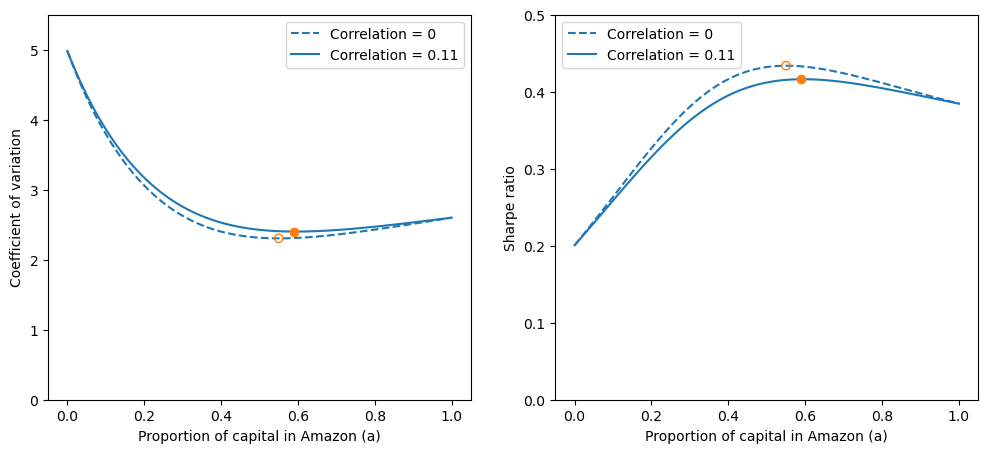

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

cor_coefficient_variation = cor_sd_return_portfolio / mean_return_portfolio
cor_sharpe_ratio = mean_return_portfolio / cor_sd_return_portfolio

cor_min_cv_idx = np.argmin(cor_coefficient_variation)

print('Optimal `a`:', round(a[cor_min_cv_idx], 2))
print('Minimum coefficient of variation:', round(cor_coefficient_variation[cor_min_cv_idx], 2))
print('Maximum Sharpe ratio:', round(cor_sharpe_ratio[cor_min_cv_idx], 2))

ax[0].plot(a, coefficient_variation, linestyle='dashed')
ax[0].plot(a, cor_coefficient_variation, c='tab:blue')
ax[1].plot(a, sharpe_ratio, linestyle='dashed')
ax[1].plot(a, cor_sharpe_ratio, c='tab:blue')
ax[0].scatter(a[min_cv_idx], coefficient_variation[min_cv_idx], edgecolors='tab:orange', facecolors='none', zorder=2)
ax[0].scatter(a[cor_min_cv_idx], cor_coefficient_variation[cor_min_cv_idx], c='tab:orange', zorder=2)
ax[1].scatter(a[min_cv_idx], sharpe_ratio[min_cv_idx], edgecolors='tab:orange', facecolors='none', zorder=2)
ax[1].scatter(a[cor_min_cv_idx], cor_sharpe_ratio[cor_min_cv_idx], c='tab:orange', zorder=2)

ax[0].legend(['Correlation = 0', 'Correlation = 0.11'])
ax[1].legend(['Correlation = 0', 'Correlation = 0.11'])

ax[0].set_ylim((0, 5.5))
ax[1].set_ylim((0, 0.5))
ax[0].set_xlabel('Proportion of capital in Amazon (a)')
ax[1].set_xlabel('Proportion of capital in Amazon (a)')
ax[0].set_ylabel('Coefficient of variation')
ax[1].set_ylabel('Sharpe ratio')

plt.show()

## Multiple coin tosses (probability of independent events)
Each coin toss is **independent** from the previous one: knowing the outcome of one trial does not give us any information about past or future trials.

Coin 1 | Coin 2
-------|-------
Heads  | Tails
Heads  | Heads
Tails  | Tails
Tails  | Heads

The **joint probability** of independent variables is their product.

$$ P(A, B) = P(A)P(B) $$

## Conditional probability
The **conditional probability** of a variable given another is given by the **Bayes' rule**.

$$ P(A | B) = \frac{P(A, B)}{P(B)} = \frac{P(B | A)P(A)}{P(B)} $$

![](images/Venn_Pie_Chart_describing_Bayes'_law.png)

## Total probability

$$ P(A) = \sum_{i}{P(A | B = b_i)P(B = b_i)} $$